In [16]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

In [17]:
dm = 2/1000
hfact = 1.2

In [42]:
sdf = src.read_csv('../Data/results/toy_star/initial.csv')
sdf.params={'mass':dm, 'hfact':hfact}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,-0.510431,-0.335169,0.056677,0,0,0,0.005044,0,26922.872621
1,-0.009126,-0.040892,0.058953,0,0,0,0.005044,0,26922.872621
2,-0.027134,0.078755,-0.661927,0,0,0,0.005044,0,26922.872621
3,-0.259780,0.023244,-0.408043,0,0,0,0.005044,0,26922.872621
4,0.032951,-0.481517,-0.008140,0,0,0,0.005044,0,26922.872621
...,...,...,...,...,...,...,...,...,...
995,0.136803,-0.039691,-0.158074,0,0,0,0.005044,0,26922.872621
996,0.628767,-0.235439,0.234652,0,0,0,0.005044,0,26922.872621
997,-0.118050,-0.125668,0.597075,0,0,0,0.005044,0,26922.872621
998,-0.297909,-0.417638,0.388422,0,0,0,0.005044,0,26922.872621


<Axes: xlabel='x', ylabel='y'>

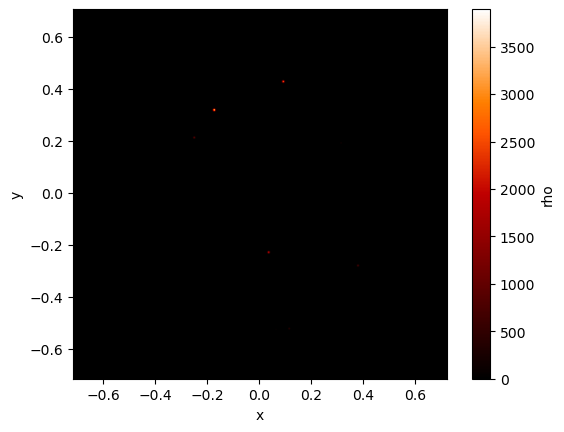

In [43]:
sdf.render('rho', xsec=0.5)

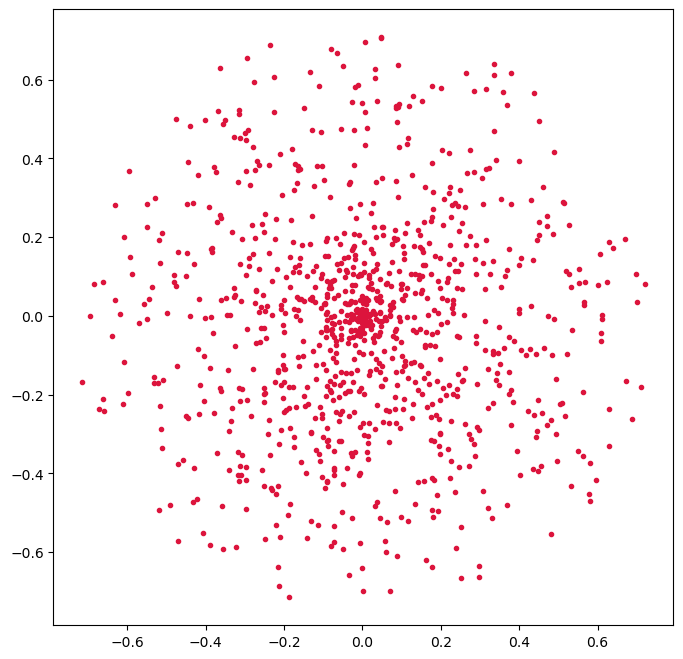

In [44]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf['x'], sdf['y'], '.', color='crimson')
plt.show()

# Density Distribution

In [5]:
def density_theo(r, R, lmbda, k):
    return lmbda/(4*k)*(R**2-r**2)

In [6]:
R = 0.75
k = 0.1
M = 2.0
n = 1.0
lmbda = 2*k / (np.pi**(1/n)) * (M*(1+n)/R**2)**(1+1/n)/M

In [7]:
r = np.linspace(0.001, 1.1*R, 100)
dens = density_theo(r, R, lmbda, k)

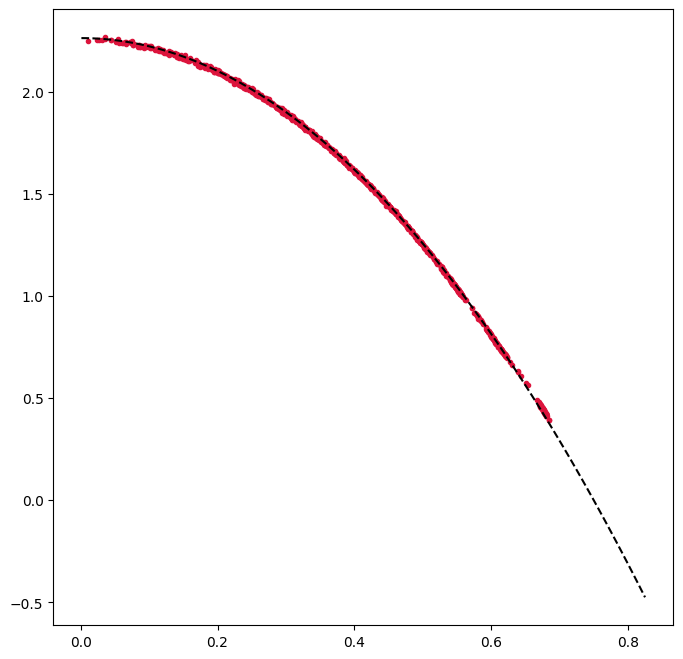

In [8]:
fig = plt.figure(figsize=(8,8))
plt.plot(np.sqrt(sdf['x']**2+sdf['y']**2), sdf['rho'], '.', color='crimson')
plt.plot(r, dens, '--', color='k')
plt.show()